<h1>ADHD Explanatory Data Analysis</h1>

<a id="explanation"></a>
# 1. Explanation

* This is an EDA notebook for data to be used for fine-tuning a Gemini model. Unfortunately, most of the data related to ADHD is either EEG/fMRI numerical continuous data or is locked behind special permission that would grant access to the data by medical organizations. Due to the hardship of accessing real-world medical data, I decided to resort to synthetic data creation that would reflect the real-life behavioral patterns of people who have ADHD. The synthetic data is generated using [mostly.ai](https://mostly.ai/). I also decided to use the [Turkish Psychological Classification for NLP](https://www.kaggle.com/datasets/zgnbyktanr/turkish-psychological-classification-for-nlp) dataset to gather more behavioral elements that would reflect the user's day-to-day problems.

<a id="analysis"></a>
# 2. Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
eng_data_1 = pd.read_csv("data\\synthetic_data\\adhd_behavior_eng_1.csv")
eng_data_2 = pd.read_csv("data\\synthetic_data\\adhd_behavior_eng_2.csv")
eng_data_3 = pd.read_csv("data\\synthetic_data\\adhd_behavior_eng_3.csv")
tr_data_1 = pd.read_csv("data\\synthetic_data\\adhd_behavior_tr_1.csv")
tr_data_2 = pd.read_csv("data\\synthetic_data\\adhd_behavior_tr_2.csv")
additional_tr_data = pd.read_csv("data\\ADHD_Turkish_behavior_dataset.csv") # only diagnosis data

In [3]:
additional_tr_data.head(10)

,tanı
0,Okuma hızım çok yavaş ve akıcı değil. Bu durum...
1,Problem çözme konusunda beceriksizim. Farklı ç...
2,Dikkat eksikliği yaşadığım için ders sırasında...
3,Görsel materyallerle öğrenmek benim için daha ...
4,Yazmaktan çok korkuyorum. Yazım hataları yapma...
5,Başladığım bir projeyi tamamlamakta zorluk çek...
6,Sözel derslerde daha başarılıyım ama sayısal d...
7,Kurallara uymakta zorlanıyorum. Öğretmenim sık...
8,"Hoca bir şeyi açıkladığında, anlamak için bir ..."
9,Sosyal ortamlarda fazla hareket etmekten rahat...


* To fill in the missing data for **additional_tr_data** dataframe, I will generate random age and gender column values and evenly distribute it. For simplicity, I will make it so that every ADHD type in **additional_tr_data** dataframe is **combined**.

In [4]:
gender_1 = ["erkek","kadın"]
type_1 = ["Kombine"]
random_gender = np.random.choice(gender_1, 79, p=[0.50, 0.50])
random_age = np.random.randint(low=6, high=50, size=79)
adhd_type = np.random.choice(type_1, 79) 

In [5]:
additional_tr_data.insert(0, "age", random_age)
additional_tr_data.insert(1, "gender", random_gender)
additional_tr_data.insert(2, "ADHD tipi", adhd_type)

In [6]:
additional_tr_data.head(10)

,age,gender,ADHD tipi,tanı
0,35,erkek,Kombine,Okuma hızım çok yavaş ve akıcı değil. Bu durum...
1,15,erkek,Kombine,Problem çözme konusunda beceriksizim. Farklı ç...
2,17,erkek,Kombine,Dikkat eksikliği yaşadığım için ders sırasında...
3,26,kadın,Kombine,Görsel materyallerle öğrenmek benim için daha ...
4,40,kadın,Kombine,Yazmaktan çok korkuyorum. Yazım hataları yapma...
5,44,erkek,Kombine,Başladığım bir projeyi tamamlamakta zorluk çek...
6,35,erkek,Kombine,Sözel derslerde daha başarılıyım ama sayısal d...
7,34,erkek,Kombine,Kurallara uymakta zorlanıyorum. Öğretmenim sık...
8,19,erkek,Kombine,"Hoca bir şeyi açıkladığında, anlamak için bir ..."
9,48,erkek,Kombine,Sosyal ortamlarda fazla hareket etmekten rahat...


In [7]:
eng_ADHD = pd.concat([eng_data_1, eng_data_2, eng_data_3], ignore_index=True)

In [10]:
eng_ADHD.head(10)

,age,gender,ADHD type,diagnosis
0,11,male,Inattentive,I have trouble concentrating.
1,10,male,Inattentive,I often forget what I was doing.
2,12,female,Inattentive,I find it hard to focus on tasks.
3,13,male,Inattentive,I get distracted easily.
4,9,female,Inattentive,It's difficult for me to pay attention.
5,14,male,Combined,I get distracted and also act without thinking.
6,11,male,Combined,I get distracted and also act without thinking.
7,16,female,Combined,I tend to be inattentive and impulsive.
8,12,male,Combined,I get distracted and often act without thinking.
9,15,male,Hyperactive/Impulsive,I can't sit still and often interrupt.


In [26]:
tr_ADHD_1 = pd.concat([tr_data_1, tr_data_2, additional_tr_data], ignore_index=True)
tr_ADHD = tr_ADHD_1.rename(columns={"ADHD tipi": "ADHD type", "tanı": "diagnosis"})
tr_ADHD["gender"] = tr_ADHD["gender"].replace(["erkek", "kadın"], ["male", "female"])
tr_ADHD["ADHD type"] = tr_ADHD["ADHD type"].replace(["Hiperaktif/Dürtüsel", "Kombine", "Dikkatsiz"], ["Hyperactive/Impulsive", "Combined", "Inattentive"])

In [28]:
tr_ADHD.head(10)

,age,gender,ADHD type,diagnosis
0,12,male,Inattentive,Derslerde ya da toplantılarda sık sık dalıp gi...
1,17,female,Hyperactive/Impulsive,Çoğu zaman huzursuz hissediyorum ve uzun süre ...
2,23,male,Combined,Kolayca dikkatim dağılıyor ve aynı zamanda yer...
3,30,female,Inattentive,Derslerde ya da toplantılarda sık sık dalıp gi...
4,19,male,Hyperactive/Impulsive,Çoğu zaman huzursuz hissediyorum ve uzun süre ...
5,25,female,Combined,Kolayca dikkatim dağılıyor ve aynı zamanda yer...
6,8,male,Inattentive,Derslerde ya da toplantılarda sık sık dalıp gi...
7,45,female,Hyperactive/Impulsive,Çoğu zaman huzursuz hissediyorum ve uzun süre ...
8,14,male,Combined,Kolayca dikkatim dağılıyor ve aynı zamanda yer...
9,29,female,Inattentive,Derslerde ya da toplantılarda sık sık dalıp gi...


In [39]:
ADHD_data_pre = pd.concat([tr_ADHD, eng_ADHD], ignore_index=True)

In [40]:
ADHD_data_pre.shape

(5079, 4)

In [42]:
ADHD_data = ADHD_data_pre.drop_duplicates(subset=["diagnosis"])

In [ ]:
ADHD_data.shape

(3223, 4)

In [47]:
ADHD_data.head(20)

,age,gender,ADHD type,diagnosis
0,12,male,Inattentive,Derslerde ya da toplantılarda sık sık dalıp gi...
1,17,female,Hyperactive/Impulsive,Çoğu zaman huzursuz hissediyorum ve uzun süre ...
2,23,male,Combined,Kolayca dikkatim dağılıyor ve aynı zamanda yer...
20,17,male,Inattentive,Derslerde sık sık dalıp gidiyorum ve talimatla...
21,22,female,Hyperactive/Impulsive,Çoğu zaman huzursuz hissediyorum ve uzun süre ...
22,19,male,Combined,Kolayca dikkatim dağılıyor ve aynı zamanda yer...
23,25,male,Inattentive,Derslerde ya da toplantılarda sık sık dalıp gi...
24,16,female,Hyperactive/Impulsive,Huzursuzluk hissiyle sık sık yerimden kalkıyor...
25,29,male,Combined,İş ve okulda birçok işe başlıyorum fakat tamam...
26,20,female,Inattentive,Derslerde ya da toplantılarda sık sık dalıp gi...


In [52]:
sns.set_style("whitegrid")

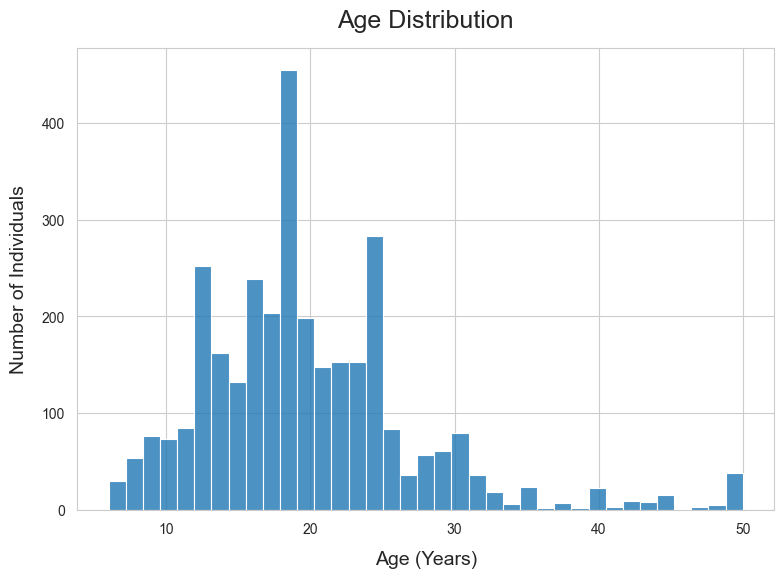

In [84]:
plt.figure(figsize=(9, 6))
sns.histplot(
    data=ADHD_data,
    x="age",
    linewidth=0.8,
    alpha=0.8,
)
plt.title("Age Distribution", fontsize=18, pad=15)
plt.xlabel("Age (Years)", fontsize=14, labelpad=10)
plt.ylabel("Number of Individuals", fontsize=14, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tick_params(axis='both', which='major', length=5)
plt.show()

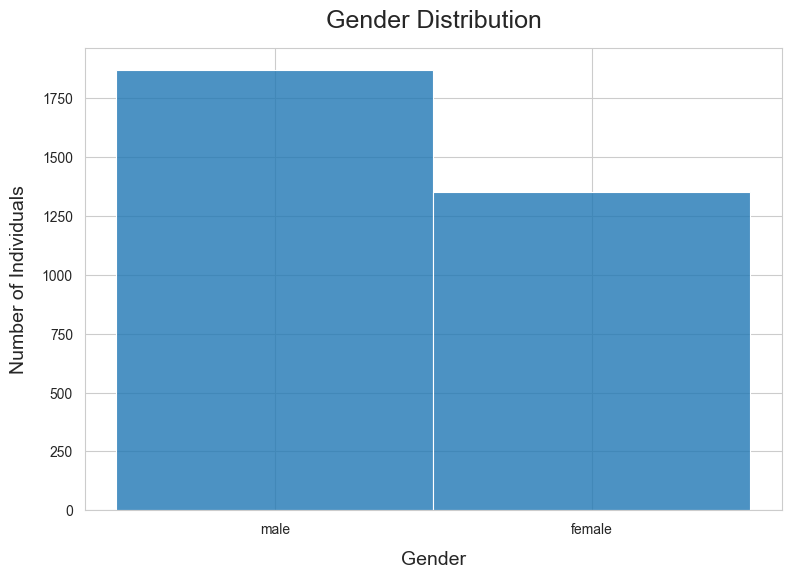

In [81]:
plt.figure(figsize=(9, 6))
sns.histplot(
    data=ADHD_data, 
    x="gender",
    linewidth=0.8,
    alpha=0.8,
)
plt.title("Gender Distribution", fontsize=18, pad=15)
plt.xlabel("Gender", fontsize=14, labelpad=10)
plt.ylabel("Number of Individuals", fontsize=14, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tick_params(axis='both', which='major', length=5)
plt.show()

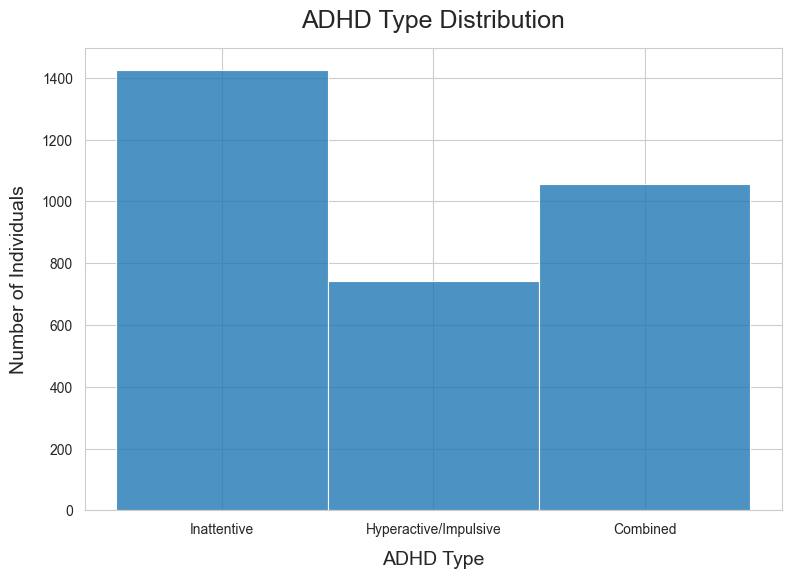

In [83]:
plt.figure(figsize=(9, 6))
sns.histplot(
    data=ADHD_data, 
    x="ADHD type",
    linewidth=0.8,
    alpha=0.8,
)
plt.title("ADHD Type Distribution", fontsize=18, pad=15)
plt.xlabel("ADHD Type", fontsize=14, labelpad=10)
plt.ylabel("Number of Individuals", fontsize=14, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tick_params(axis='both', which='major', length=5)
plt.show()

<a id="conclusion"></a>
# 3. Conclusion

From the histograms shown above, we can draw some conclusions about ADHD and its characteristics. In the creation of synthetic data, I was very careful when it came to making the data as close to real-life data as possible.

* **Age Distribution** histogram shows us that, more often than not, ADHD is more prevalent in teenagers and young adults (ages 10 to 30) according to the synthetic data. This actually reflects real-world data by a significant margin. In the real world, the average age for an ADHD diagnosis is often cited around 7 years old. But in developing our ADHD mobile application, catering to older age groups, albeit still young, is a crucial decision because teenagers and young adults are more likely to have a phone and the urge to use a mobile application for their own convenience.

* **Gender Distribution** histogram shows us that males are slightly more likely to be diagnosed with ADHD, and real-world data reflects the same. Males are diagnosed at a significantly higher rate. However, the reason for this could be that females are underdiagnosed or diagnosed later in life due to their more internalized symptoms and historical gender biases in recognition and referral processes. So in the end, gender differences are negligible.

* **ADHD Type Distribution** histogram shows us that the Inattentive type is the most common type of ADHD according to the synthetic data. For most people, ADHD is a spectrum, so this typing is not necessarily crucial in developing our ADHD mobile application. However, it is still valuable information when it comes to classifying and treating our users when they are using our mobile application. In the real world, the Inattentive type is more common than the Hyperactive/Impulsive type, but the Combined type is generally more often encountered when diagnosing ADHD. But our mobile application would behave generally the same for each type of ADHD.